In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = np.array(iris.data)
Y = np.array(iris.target)

In [3]:
x=pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y=pd.DataFrame(iris.target, columns=['Target'])

Text(0.5, 1.0, 'Petal Length vs Petal Width')

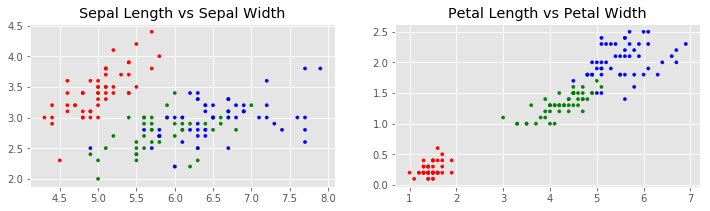

In [4]:
plt.figure(figsize=(12,3))
c = np.array(['red', 'green', 'blue'])
plt.subplot(1,2,1)

plt.scatter(x['Sepal Length'], x['Sepal Width'], c=c[y['Target']], s=10)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= c[y.Target], s=10)
plt.title('Petal Length vs Petal Width')

# using sklearn Library

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, "Model's classification")

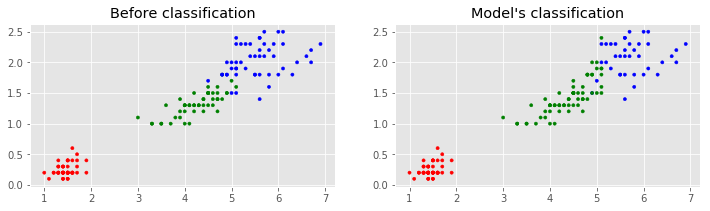

In [6]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])

pred_Y = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=c[y['Target']], s=10)
plt.title('Before classification')
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=c[pred_Y], s=10)
plt.title("Model's classification")


Text(0.5, 1.0, "Model's classification")

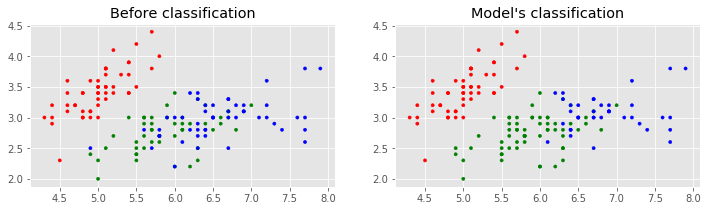

In [7]:
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=c[y['Target']], s=10)
plt.title('Before classification')

plt.subplot(1, 2, 2)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=c[pred_Y], s=10)
plt.title("Model's classification")

# Without Libr

In [8]:
points = np.vstack(X)

In [9]:
def init_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    d = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(d, axis=0)

In [10]:
c = init_centroids(points,3)
new_min= closest_centroid(points, c)

In [11]:
new_min

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
c_old = c[:,np.newaxis,:]
c_old_temp = c_old

In [13]:
def new_centroids_each_iter(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [14]:
new_c_1 = new_centroids_each_iter(points, new_min, c_old)
new_min_1 = closest_centroid(points, new_c_1)
new_c_1, new_min_1

(array([[6.34  , 2.9525, 5.3375, 2.02  ],
        [5.475 , 3.09  , 2.863 , 0.782 ],
        [7.54  , 3.15  , 6.39  , 2.09  ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [15]:
new_c_2 = new_centroids_each_iter(points, new_min_1, new_c_1)
new_min_2 = closest_centroid(points, new_c_2)
new_c_2, new_min_2

(array([[6.28181818, 2.92121212, 5.01060606, 1.77727273],
        [5.16944444, 3.17083333, 2.18611111, 0.52777778],
        [7.475     , 3.125     , 6.3       , 2.05      ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0], dtype=int64))

In [16]:
for i in range(10):
    new_loop_c = new_centroids_each_iter(points, new_min, c_old)
    new_loop_min = closest_centroid(points, new_c_2)
#     print(new_loop_c , new_loop_min)
    if np.array_equal(new_loop_c, c_old):
        break;
    else:
        c_old, new_min = new_loop_c, new_loop_min

In [17]:
# NEW centroids
new_loop_c

array([[6.13      , 2.8525    , 4.76375   , 1.635     ],
       [5.01818182, 3.33090909, 1.63090909, 0.31636364],
       [7.34      , 3.14666667, 6.19333333, 2.11333333]])

Text(0.5, 1.0, 'New centroids')

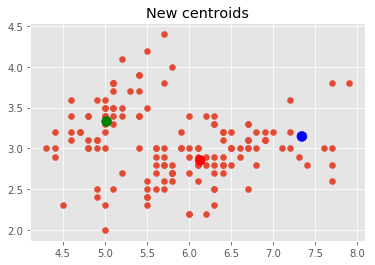

In [18]:
plt.scatter(points[:, 0], points[:, 1])
c = new_loop_c
plt.scatter(c[:, 0], c[:, 1], c=['r','g','b'], s=100)
plt.title('New centroids')